In [22]:
# Dependencies
import requests, json, pprint, csv, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [23]:
# Reference path to raw data CSV 
csv_path = 'raw_data/athlete_events.csv'

# Read CSV into Pandas DataFrame
raw_olympics_df = pd.read_csv(csv_path)

raw_olympics_df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [24]:
#Obtain min, max, median values for Weight and Height
male_df = raw_olympics_df[raw_olympics_df.Sex=='M']
sport_weight_height_metrics = male_df.groupby(['Sport'])['Weight','Height'].agg(['min','max','mean'])

In [25]:
sport_weight_height_metrics

Weight                   Height                   
                    min    max       mean    min    max        mean
Sport                                                              
Aeronautics         NaN    NaN        NaN    NaN    NaN         NaN
Alpine Skiing      50.0  107.0  78.626035  142.0  200.0  177.891374
Alpinism            NaN    NaN        NaN    NaN    NaN         NaN
Archery            46.0  130.0  77.066866  157.0  197.0  178.477842
Art Competitions   59.0   93.0  75.290909  150.0  190.0  174.896552
...                 ...    ...        ...    ...    ...         ...
Tug-Of-War         75.0  118.0  95.615385  170.0  195.0  182.480000
Volleyball         56.0  120.0  86.925926  170.0  219.0  193.265660
Water Polo         61.0  125.0  87.706172  154.0  206.0  186.801739
Weightlifting      50.0  176.5  80.251796  140.0  205.0  169.153061
Wrestling          47.0  190.0  76.400640  137.0  214.0  172.870686

[63 rows x 6 columns]

In [26]:
sport_weight_height_metrics.Weight.dropna().sort_values('mean', ascending=False)

,min,max,mean
Sport,,,
Tug-Of-War,75.0,118.0,95.615385
Basketball,59.0,156.0,91.683529
Rugby Sevens,65.0,113.0,91.006623
Bobsleigh,55.0,145.0,90.387385
Beach Volleyball,62.0,110.0,89.512821
Handball,62.0,132.0,89.387914
Water Polo,61.0,125.0,87.706172
Volleyball,56.0,120.0,86.925926
Baseball,38.0,120.0,85.707792


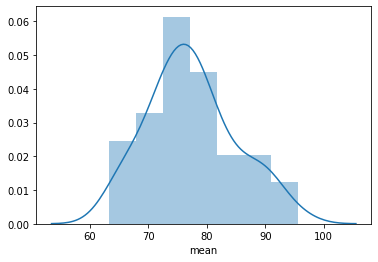

In [27]:
#Plot mean values of weight on a histogram
sns.distplot(sport_weight_height_metrics.Weight.dropna()['mean'])

In [28]:
sport_weight_height_metrics.Height.dropna().sort_values('mean', ascending=False)

,min,max,mean
Sport,,,
Basketball,163.0,226.0,194.872624
Beach Volleyball,179.0,212.0,193.290909
Volleyball,170.0,219.0,193.265660
Handball,140.0,214.0,188.778373
Rowing,132.0,209.0,186.882698
Water Polo,154.0,206.0,186.801739
Tennis,162.0,208.0,184.847806
Swimming,147.0,209.0,184.310928
Rugby Sevens,169.0,198.0,182.834437


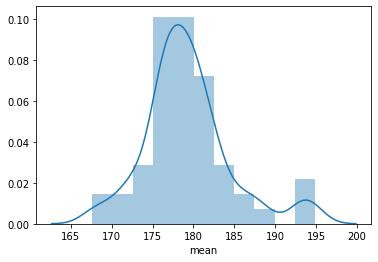

In [29]:
#Plot mean values of Height on a histogram
sns.distplot(sport_weight_height_metrics.Height.dropna()['mean'])


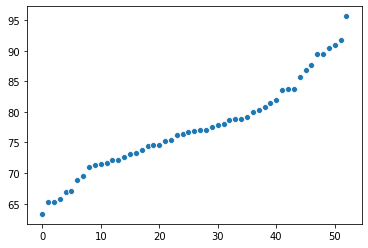

In [30]:
#Create a variable and store all the  weight values
means = list(sport_weight_height_metrics.Weight.dropna()['mean'])

#create a variable and store all the index values
sports = list(sport_weight_height_metrics.Weight.dropna().index)

plot_data = sorted(zip(sports, means), key = lambda x:x[1])
plot_data_dict = {
    'x' : [i for i, _ in enumerate(plot_data)],
    'y' : [v[1] for i, v in enumerate(plot_data)],
    'group' :  [v[0] for i, v in enumerate(plot_data)]
}

#Plot a scatter plot for x,y values
sns.scatterplot(data = plot_data_dict, x = 'x' , y = 'y')

In [31]:
plot_data

[('Gymnastics', 63.34360475924893),
 ('Ski Jumping', 65.24588053553038),
 ('Boxing', 65.29627979505457),
 ('Trampolining', 65.83783783783784),
 ('Nordic Combined', 66.9095595126523),
 ('Diving', 67.06937799043062),
 ('Triathlon', 68.80377358490566),
 ('Figure Skating', 69.59164420485175),
 ('Equestrianism', 70.92455882352941),
 ('Short Track Speed Skating', 71.40186915887851),
 ('Table Tennis', 71.41423948220064),
 ('Cross Country Skiing', 71.70083164756124),
 ('Modern Pentathlon', 72.06882406563355),
 ('Cycling', 72.19023413431916),
 ('Biathlon', 72.6321225071225),
 ('Football', 73.08664412510566),
 ('Hockey', 73.34376086200903),
 ('Athletics', 73.83912862302066),
 ('Badminton', 74.36253561253561),
 ('Freestyle Skiing', 74.64814814814815),
 ('Taekwondo', 74.65359477124183),
 ('Art Competitions', 75.2909090909091),
 ('Fencing', 75.38197650020982),
 ('Speed Skating', 76.30040322580645),
 ('Wrestling', 76.40063974410236),
 ('Lacrosse', 76.71428571428571),
 ('Snowboarding', 76.86159844054

In [32]:
#print top 5 lightest values
print('lightest:')
for sport,weight in plot_data[:5]:
    print(sport + ': ' + str(weight))
    
#print top 5 heaviest values
print('\nheaviest:')    
for sport,weight in plot_data[-5:]:
    print(sport + ': ' + str(weight))

lightest:
Gymnastics: 63.34360475924893
Ski Jumping: 65.24588053553038
Boxing: 65.29627979505457
Trampolining: 65.83783783783784
Nordic Combined: 66.9095595126523

heaviest:
Beach Volleyball: 89.51282051282051
Bobsleigh: 90.38738521024649
Rugby Sevens: 91.00662251655629
Basketball: 91.68352893565358
Tug-Of-War: 95.61538461538461


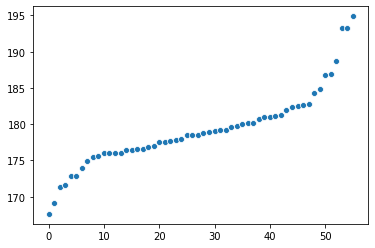

In [33]:
#Create a variable and store all the height values
means = list(sport_weight_height_metrics.Height.dropna()['mean'])

#create a variable and store all the index values
sports = list(sport_weight_height_metrics.Height.dropna().index)

plot_data = sorted(zip(sports, means), key = lambda x:x[1])
plot_data_dict = {
    'x' : [i for i, _ in enumerate(plot_data)],
    'y' : [v[1] for i, v in enumerate(plot_data)],
    'group' :  [v[0] for i, v in enumerate(plot_data)]
}

#create a scatter plot for x and y
sns.scatterplot(data = plot_data_dict, x = 'x' , y = 'y')

In [34]:
#print top 5 shortest values
print('shortest:')
for sport,height in plot_data[:5]:
    print(sport + ': ' + str(height))

#print top 5 tallest values
print('\ntallest:')    
for sport,height in plot_data[-5:]:
    print(sport + ': ' + str(height))

shortest:
Gymnastics: 167.6444383959354
Weightlifting: 169.1530612244898
Trampolining: 171.3684210526316
Diving: 171.55535224153707
Wrestling: 172.87068623562078

tallest:
Rowing: 186.88269794721407
Handball: 188.77837311251827
Volleyball: 193.26565995525726
Beach Volleyball: 193.29090909090908
Basketball: 194.87262357414448


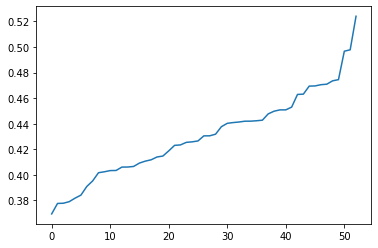

In [35]:
#Create a variable to store all the mean values of height, weight and find the avergae build 
mean_heights = sport_weight_height_metrics.Height.dropna()['mean']
mean_weights = sport_weight_height_metrics.Weight.dropna()['mean']

#obtain the avg build of each player
avg_build = mean_weights/mean_heights
avg_build.sort_values(ascending = True)
builds = list(avg_build.sort_values(ascending = True))

#Create a line plot for x,y values
plot_dict = {'x':[i for i,_ in enumerate(builds)],'y':builds}
sns.lineplot(data=plot_dict, x='x', y='y')

In [37]:
#Display the average build of player per sport
avg_build.sort_values(ascending=False)

Sport
Tug-Of-War                   0.523977
Rugby Sevens                 0.497754
Bobsleigh                    0.496656
Weightlifting                0.474433
Handball                     0.473507
Judo                         0.470872
Basketball                   0.470479
Water Polo                   0.469515
Baseball                     0.469376
Beach Volleyball             0.463099
Ice Hockey                   0.462870
Skeleton                     0.452958
Curling                      0.450811
Luge                         0.450804
Volleyball                   0.449774
Rowing                       0.447691
Golf                         0.442746
Shooting                     0.442301
Alpine Skiing                0.441989
Wrestling                    0.441953
Canoeing                     0.441318
Lacrosse                     0.440887
Rugby                        0.440288
Sailing                      0.437672
Archery                      0.431801
Snowboarding                 0.430534
Art Co

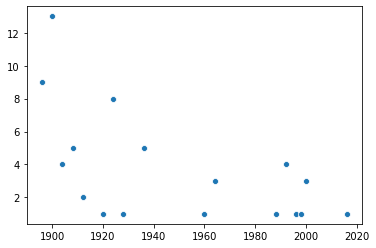

In [20]:
#Calculate the min year of each sport
sport_min_year = male_df.groupby('Sport').Year.agg(['min','max'])['min'].sort_values('index')

#Create a variable to store the values of year_count
year_count = {}
for y in sport_min_year:
    try:
        year_count[y] += 1
    except:
        year_count[y] = 1
year = [k for k,v in year_count.items()]
new_sports = [v for k,v in year_count.items()]

data = {'x':year, 'y':new_sports}

#create a scatter plot for x,y values
sns.scatterplot(data=data, x = 'x', y='y')

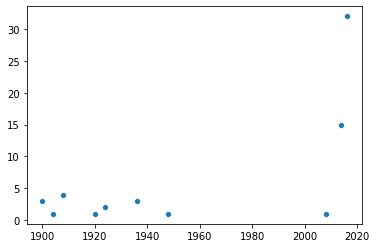

In [21]:
#Calculate the max year of each sport
sport_max_year = male_df.groupby('Sport').Year.agg(['min','max'])['max'].sort_values('index')

#Create a variable to store the values of year_count
year_count = {}
for y in sport_max_year:
    try:
        year_count[y] += 1
    except:
        year_count[y] = 1
year = [k for k,v in year_count.items()]
deprecated_sports = [v for k,v in year_count.items()]

data = {'x':year, 'y':deprecated_sports}

#create a scatter plot for x,y values
sns.scatterplot(data=data, x = 'x', y='y')

In [22]:
#Display values of max years under 2000
sport_max_year[sport_max_year <2000]

Sport
Basque Pelota          1900
Croquet                1900
Cricket                1900
Roque                  1904
Jeu De Paume           1908
Racquets               1908
Motorboating           1908
Lacrosse               1908
Tug-Of-War             1920
Rugby                  1924
Military Ski Patrol    1924
Polo                   1936
Aeronautics            1936
Alpinism               1936
Art Competitions       1948
Name: max, dtype: int64

In [23]:
#display values of min year over 1936
sport_min_year[sport_min_year >1936]

Sport
Biathlon                     1960
Luge                         1964
Volleyball                   1964
Judo                         1964
Table Tennis                 1988
Baseball                     1992
Short Track Speed Skating    1992
Badminton                    1992
Freestyle Skiing             1992
Beach Volleyball             1996
Snowboarding                 1998
Taekwondo                    2000
Trampolining                 2000
Triathlon                    2000
Rugby Sevens                 2016
Name: min, dtype: int64